# Comparação visual de resultados

Este notebook obtém patches ou tiles inferidos para modelos e plota lado a lado para comparação visual

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# imports

import os
import sys
sys.path.append(os.path.abspath('..'))
from rasterio.coords import BoundingBox

import src.data.preprocess_data as data
import src.data.view as view
import src.data.utils as utils
import src.data.mask_processing as mask

import torch

Unet-64 CEW
97% classe 4

Unet-64 DS-CEW
80% classe 3

HRNet-W18 CEW
75% classe 2

UNet-256 DS-CEW
75% classe 1

In [2]:
working_dir = os.path.abspath('..')


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
[0 1 2 3 4] [2615989   38370   14204   10542  418495]
[0 1 2 3 4] [1385585   16316  177627   28390 1489682]
1760 0
1760 0
(1760, 1760)
[0 1 2 3 4]
/home/jonathan/UrbanizedAreasSegmentation/data/results/S2-16D_V2_032027/6x6_subtiles/UNet-256-type-DS-CE/S2-16D_V2_032027_x=0_y=1760.tif
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 254.0, 'width': 1760, 'height': 1760, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown based on GRS80 ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-12],PARAMETER["longitude_of_center",-54],PARAMETER["standard_parallel_1",-2],PARAMETER["standard_parallel_2",-22],PARAMETER["false_easting",5000000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",

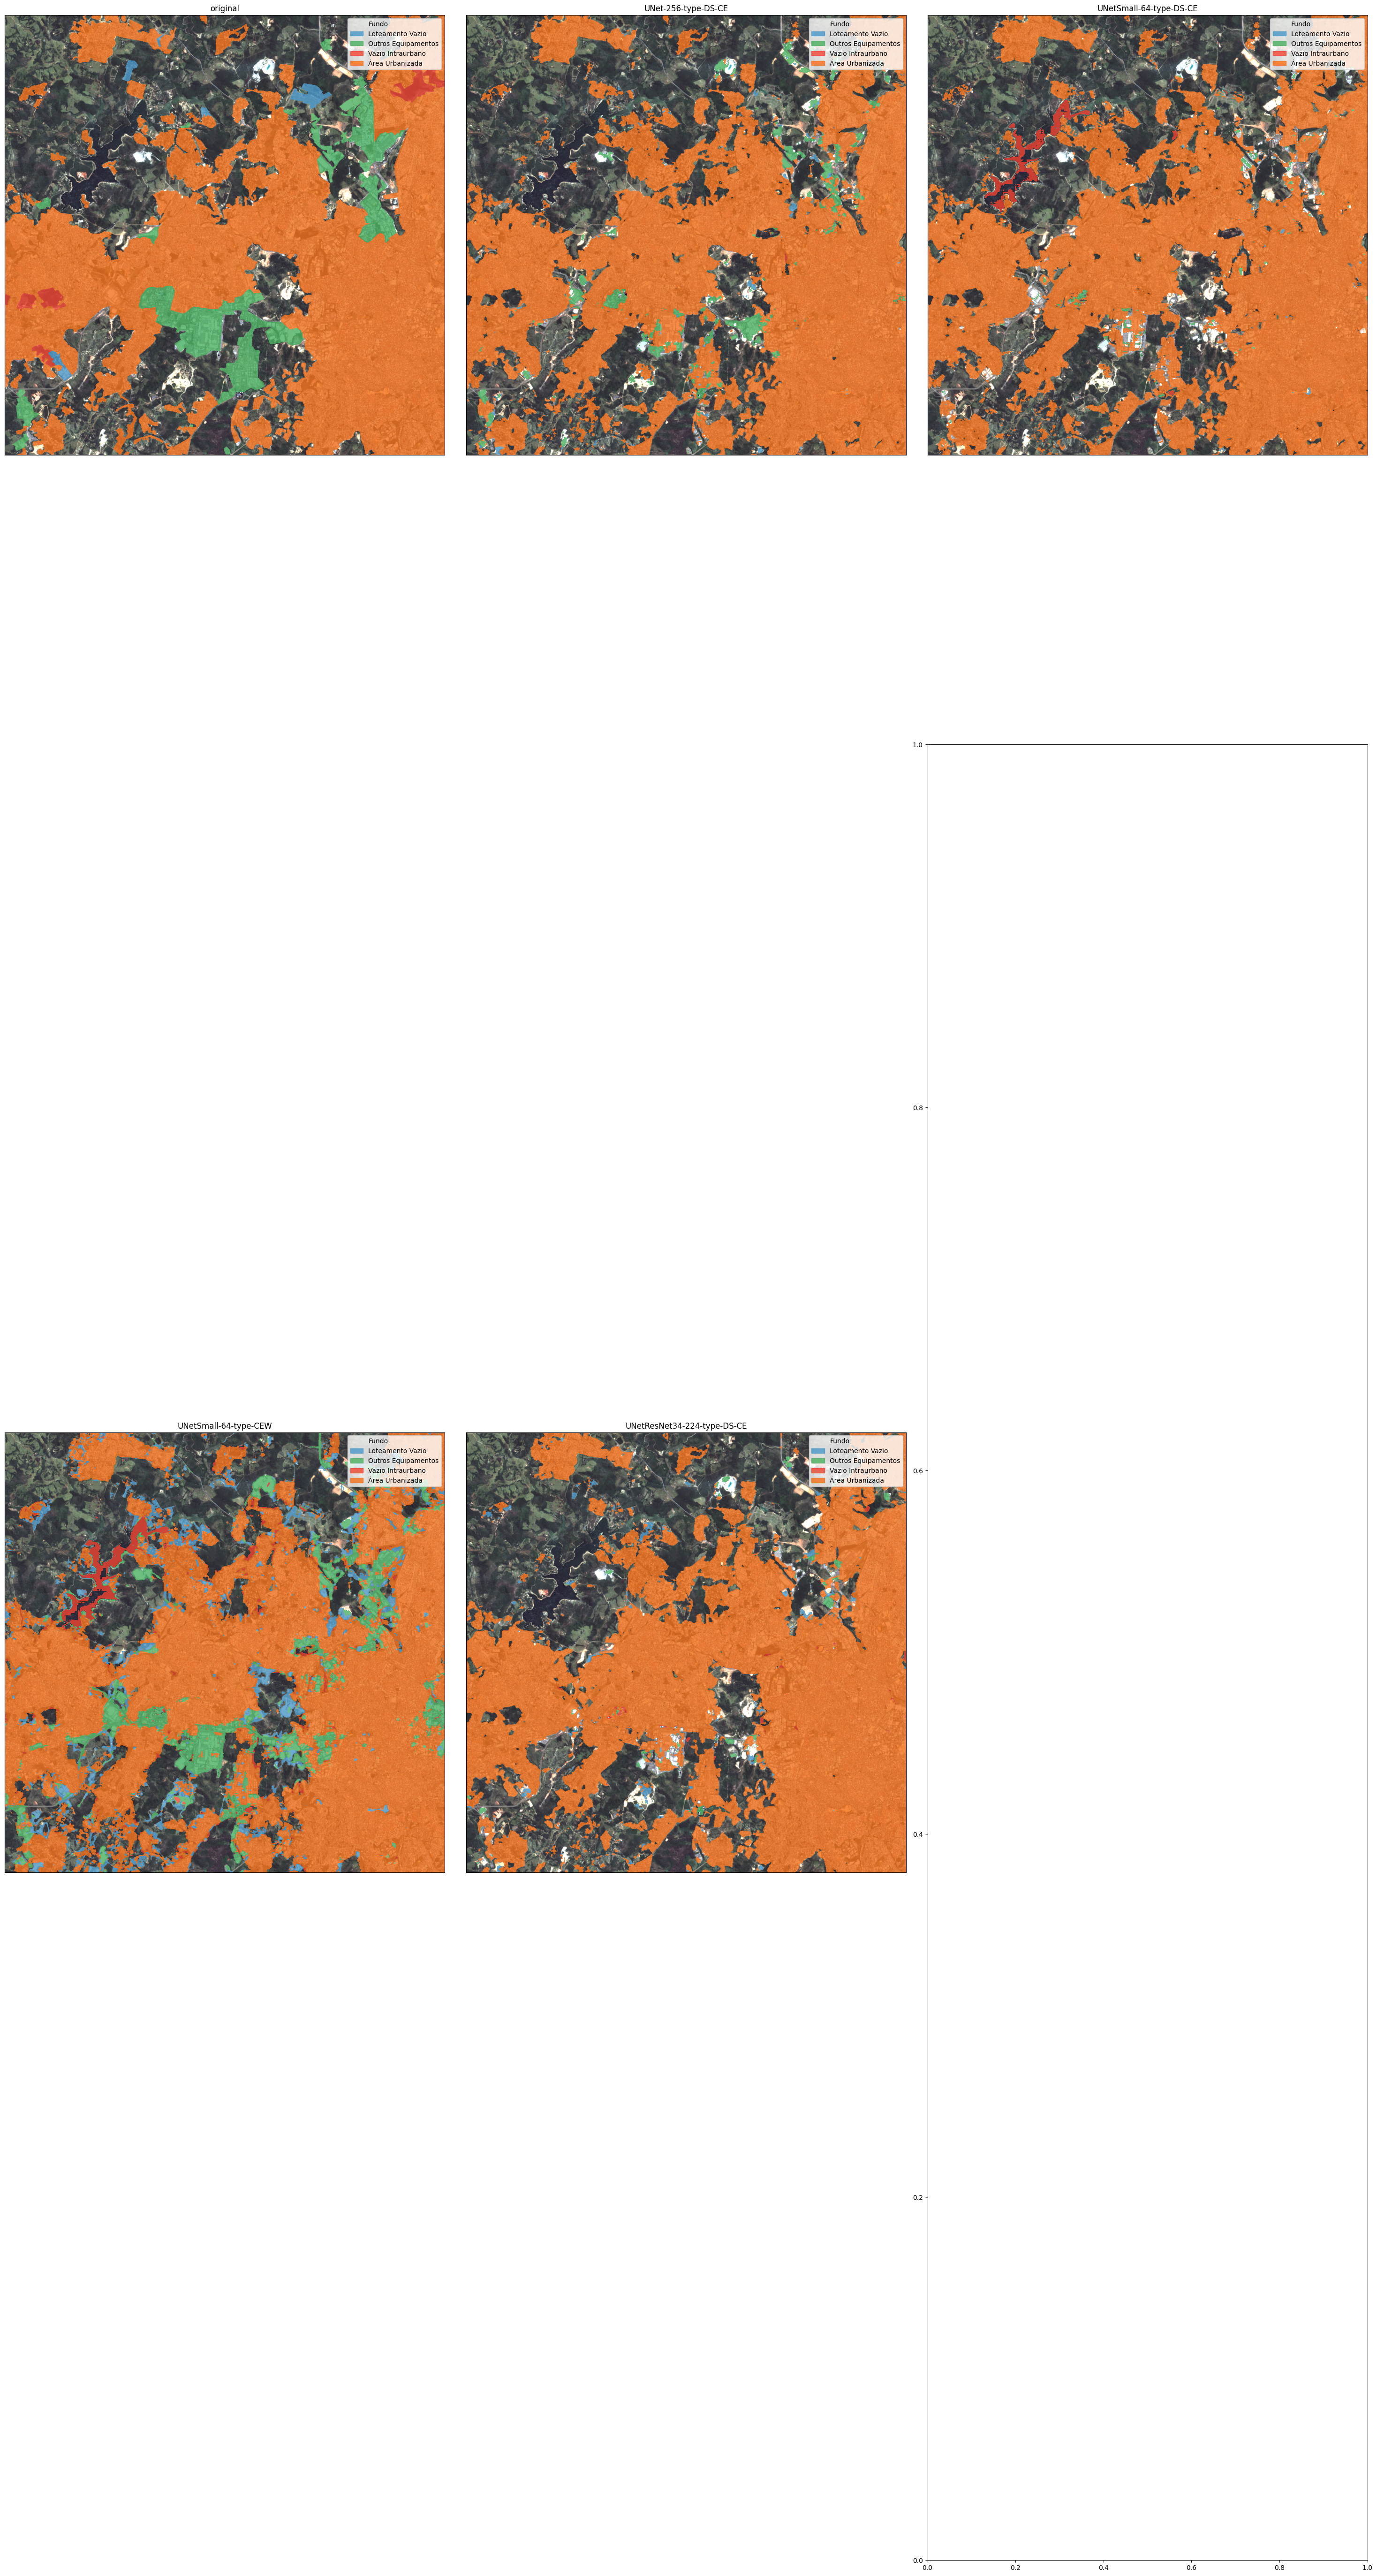

In [3]:
models = ['UNet-256-type-DS-CEW', 'HRNetW18-512-type-CEW', 'UNetSmall-64-type-DS-CEW', 'UNet-64-type-CEW', 'UNet-256-type-DS-CE']

models = [{'model_name': 'UNet-256-type-DS-CEW', 'patch_size':256, 'batch_size':16, 'note': 'best recall on class 1 on test set'},
          {'model_name': 'UNet-256-type-DS-CE', 'patch_size':256, 'batch_size':16, 'note': 'best on weigted recall on test set, best on class 1 precision'},
          {'model_name': 'HRNetW18-512-type-CEW', 'patch_size':512, 'batch_size':4, 'note': 'best recall on class 2 on test set'},
          {'model_name': 'HRNetW32-512-type-CE', 'patch_size':512, 'batch_size':4, 'note': 'best recall on class 0 on test set'},

          {'model_name': 'UNetSmall-64-type-DS-CEW', 'patch_size':64, 'batch_size':16, 'note': 'best recall on class 3 on test set, best on macro recall on test set'},
          {'model_name': 'UNet-64-type-CEW', 'patch_size':64, 'batch_size':16, 'note': 'best recall on class 4 on test set'},
          #---
          {'model_name': 'UNet-64-type-DS-CE', 'patch_size':64, 'batch_size':16, 'note': 'best f1 on class 0 on test set'},
          {'model_name': 'UNetResNet34-224-type-DS-CE', 'patch_size':224, 'batch_size':16, 'note': 'best f1 on class 1 on test set, best macro precision'},
          {'model_name': 'UNetSmall-64-type-CEW', 'patch_size':224, 'batch_size':16, 'note': 'best f1 on class 2 on test set'},
          {'model_name': 'UNetEfficientNetB0-224-type-DS-CE', 'patch_size':224, 'batch_size':16, 'note': 'best f1 and precision on class 3 on test set'},
          {'model_name': 'UNetSmall-64-type-DS-CE', 'patch_size':64, 'batch_size':16, 'note': 'best f1 on class 4 on test set'},
          {'model_name': 'UNetSmall-64-type-CEW', 'patch_size':64, 'batch_size':16, 'note': 'best macro f1 on test set'},
          {'model_name': 'UNet-256-type-CEW', 'patch_size':256, 'batch_size':16, 'note': 'best global f1 on test set'},
          #----
          {'model_name': 'UNetSmall-64-type-DS-CEW', 'patch_size':64, 'batch_size':16, 'note': 'best precision on class 0 on test set'},
          {'model_name': 'HRNetW48-512-type-DS-CE', 'patch_size':512, 'batch_size':4, 'note': 'best precision on class 2 on test set'},
          {'model_name': 'UNetConvNext-224-type-DS-CEW', 'patch_size':224, 'batch_size':16, 'note': 'best precision on class 4 on test set'},
          {'model_name': 'UNetEfficientNetB0-224-type-DS-CEW', 'patch_size':224, 'batch_size':16, 'note': 'best global precision on test set'},
          
          ]

models = [{'model_name': 'UNet-256-type-DS-CE', 'patch_size':256, 'batch_size':16, 'note': 'best acc, f1 macro, f1 micro on val set'},
          {'model_name': 'UNetSmall-64-type-DS-CE', 'patch_size':64, 'batch_size':16, 'note': '2nd best acc and , f1 micro on val set'},
          {'model_name': 'UNetSmall-64-type-CEW', 'patch_size':64, 'batch_size':16, 'note': '2ds best macro f1 on val set'},
          {'model_name': 'UNetResNet34-224-type-DS-CE', 'patch_size':224, 'batch_size':16, 'note': '3rd best acc, macro and micro f1 on val set'},
          ]

label_map = {
        0: ('Reds', 0.0, 'Fundo'),
        1: ('Blues', 0.8, 'Loteamento Vazio'),
        2: ('Greens', 0.8, 'Outros Equipamentos'),
        3: ('Reds', 0.8, 'Vazio Intraurbano'),
        4: ('Oranges', 0.8, 'Área Urbanizada')
    }
fig, axs = plt.subplots(len(models)//3+1, 3, figsize=(30, 70))
axs = axs.flatten()
print(axs)
i = 0

most_1_2_3 = 0
selected_x, selected_y = 0,0
w, h = (10560//6, 10560//6)
for x in range(0, 10560, h):
    for y in range(0, 10560, w):
        window = rasterio.windows.Window(x, y, h, w)
        with rasterio.open(os.path.join(working_dir,'data', 'masks', 'mask_raster_032027.tif')) as src:
            content = src.read(window=window)
            meta = src.meta
            
        original = mask.get_type(np.squeeze(content))
        unique, counts = np.unique_counts(original)

        if len(unique)>=5:
            if counts[1]+counts[2]+counts[3]>most_1_2_3:
                most_1_2_3 = counts[1]+counts[2]+counts[3]
                selected_x, selected_y = x, y
                print(unique, counts)

                mask_content = mask.get_type(np.squeeze(content))
        #if len(np.unique(original))>=4:
        #    print(x, y)
        #    break
    #break
#selected_x, selected_y = 0,0

subtile_x = selected_x//(10560//6)*10560//6
subtile_y = selected_y//(10560//6)*10560//6
print(subtile_x, subtile_y)
print(selected_x, selected_y)

window = rasterio.windows.Window(0, 0, h, w)

img_file = os.path.join(working_dir,'data', 'processed', 'S2-16D_V2_032027', '6x6_subtiles' ,f'S2-16D_V2_032027_x={subtile_x}_y={subtile_y}.tif')
with rasterio.open(img_file) as src:
    content = src.read(window=window)
    meta = src.meta

img = data.preprocess_data(content, treat_nans = True, return_torch = False)
img = view.raster_to_rgb(img)

print(mask_content.shape)
print(np.unique(mask_content))
view.plot_masked_image(mask_content, label_map, image=img, title='original', ax=axs[0], figsize=(15,15))

window = rasterio.windows.Window(selected_x, selected_y, h, w)

for i, model_dict in zip(range(17),models): 
    model_ = model_dict['model_name']
    path = os.path.join(working_dir,'data', 'results', 'S2-16D_V2_032027', '6x6_subtiles', model_,f'S2-16D_V2_032027_x={subtile_y}_y={subtile_x}.tif')
    print(path)
    try:
        with rasterio.open(path) as src:
            content = src.read()
            meta = src.meta
            print(meta)
    except:
        print(model_, ' SKIP...')
        continue
    print(np.squeeze(content).shape)
    print(content.shape)
    view.plot_masked_image(np.squeeze(content), label_map, image=img, title=model_, ax=axs[i+1], figsize=(15,15))
fig.tight_layout(pad=3.0, w_pad=1.0, h_pad=2.0)
plt.show()
    

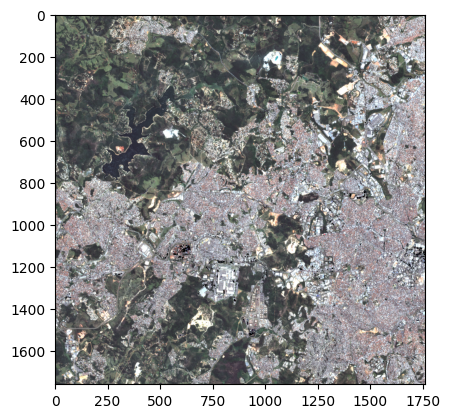

In [4]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show

# Open the raster file
raster_path = 'path/to/your/raster_file.tif'
with rasterio.open(f'/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x={subtile_x}_y={subtile_y}.tif') as src:

    # Read all bands
    content = src.read()
    content = view.raster_to_rgb(content)
    plt.imshow(content)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def overlay_segmentation(image, mask, pred, alpha=0.5):
    """Sobrepõe máscara real e previsão sobre a imagem"""
    color_map = {
        0: (0, 0, 0),       # Fundo (preto)
        1: (255, 0, 0),     # Classe 1 (azul)
        2: (0, 255, 0),     # Classe 2 (verde)
        3: (0, 0, 255),     # Classe 3 (vermelho)
        4: (255, 255, 0),   # Classe 4 (amarelo)
    }

    def colorize(mask):
        """Aplica coloração para cada classe"""
        h, w = mask.shape
        color_mask = np.zeros((h, w, 3), dtype=np.uint8)
        for cls, color in color_map.items():
            color_mask[mask == cls] = color
        return color_mask

    mask_color = colorize(mask)
    pred_color = colorize(pred)

    blended_mask = cv2.addWeighted(image, 1 - alpha, mask_color, alpha, 0)
    blended_pred = cv2.addWeighted(image, 1 - alpha, pred_color, alpha, 0)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(image)
    axs[0].set_title("Imagem Original")
    axs[1].imshow(blended_mask)
    axs[1].set_title("Máscara Real")
    axs[2].imshow(blended_pred)
    axs[2].set_title("Previsão")
    plt.show()

# Exemplo de uso:
# overlay_segmentation(image, mask_real, mask_predita)